# Predictive Analytics of Social Media Virality

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# Load the dataset


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('Twitter.data', header=None)

In [5]:
df.shape

(583250, 78)

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000004,0.000004,0.000004,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,2,0,0,1,1,1,0.000000,0.000003,0.0,0.000000,0.000002,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,1,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,0,0,0,4,0.000007,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,0,4,0.000003,0.000002,0.0,0.000000,0.000000,0.000000,0.000006,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,0,4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,0,0,4,1,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,4,1,0.000002,0.000000,0.0,0.000000,0.000000,0.000006,0.000002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,4,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0.000003,0.000000,0.000000,0.000003,0.000000,0.000000,0.000001,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,0.000002,0.000000,0.0,0.000001,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,0,1,2,3,0.000000,0.000003,0.000000,0.000000,0.000001,0.000002,0.000003,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,2,3,0.000000,0.000001,0.0,0.000000,0.000000,0.000001,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,2,3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,2,3,0.5
5,1,0,0,1,2,3,0,1,0,0,1,2,3,0,0.000003,0.000000,0.000000,0.000001,0.000002,0.000003,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,1,2,3,0,0.000001,0.000000,0.0,0.000000,0.000001,0.000002,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,1,2,3,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,1,2,3,0,1.0
6,1,0,0,0,2,0,2,1,0,0,0,2,0,2,0.000001,0.000000,0.000000,0.000000,0.000002,0.000000,0.000002,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0,2,0,2,0.000000,0.000000,0.0,0.000000,0.000001,0.000000,0.000001,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0,2,0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0,2,0,2,0.0
7,0,2,0,0,0,1,1,0,2,0,0,0,1,1,0.000000,0.000002,0.000000,0.000000,0.000000,0.000001,0.000001,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,2,0,0,0,1,1,0.000000,0.000001,0.0,0.000000,0.000000,0.000001,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,2,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,2,0,0,0,1,1,2.0
8,2,0,0,0,1,1,2,2,0,0,0,1,1,2,0.000002,0.000000,0.000000,0.000000,0.000001,0.000001,0.000002,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2,0,0,0,1,1,2,0.000001,0.000000,0.0,0.000000,0.000001,0.000000,0.000001,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2,0,0,0,1,1,2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2,0,0,0,1,1,2,1.0
9,0,1,1,2,2,0,3,0,1,1,2,2,0,2,0.000000,0.000001,0.000001,0.000002,0.000002,0.000000,0.000003,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1,1,2,2,0,3,0.000000,0.000001,0.0,0.000001,0.000001,0.000000,0.000001,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1,1,2,2,0,3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1,1,2,2,0,3,0.5


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.00000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,93.774819,103.895695,113.611141,112.940921,0.000202,0.000196,0.000221,0.000242,0.000261,0.000282,0.000279,0.925390,0.918146,0.907052,0.919954,0.930657,0.956070,0.955341,150.662500,146.641742,170.721461,193.785891,214.195769,234.217821,233.236096,0.000114,0.000111,0.000124,0.000136,0.000147,0.000159,0.000157,0.930802,0.923062,0.911607,0.924581,0.935371,0.960881,0.960626,1.045500,1.035194,1.017044,1.032634,1.045863,1.078122,1.081759,123.063726,119.579506,138.95852,157.423923,173.702114,189.521478,188.410279,1.095255,1.083723,1.066749,1.085214,1.100215,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,278.892403,309.197403,326.076900,326.015321,0.000566,0.000554,0.000606,0.000655,0.000700,0.000733,0.000725,0.255501,0.267750,0.284565,0.265014,0.247084,0.195982,0.196997,453.688976,452.039293,523.801730,598.287599,654.468973,694.165947,696.419518,0.000348,0.000342,0.000369,0.000394,0.000417,0.000436,0.000432,0.253792,0.266493,0.283865,0.264066,0.245871,0.193878,0.194484,1.359435,1.469697,1.208122,1.250218,1.286331,1.300013,1.422899,350.215322,347.236577,403.60343,460.884365,503.660822,532.315495,531.152778,1.487985,1.586863,1.315780,1.370743,1.405731,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,0.000004,0.000004,0.000005,0.000006,0.000007,0.000008,0.000008,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,5.000000,5.000000,7.000000,7.000000,0.000002,0.000002,0.000003,0.000003,0.000003,0.000004,0.000004,1.000000,1.000000,1.000000,1.000000,1.00

In [8]:
df.columns=['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6','Annotation']

In [9]:
X1=df[['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6']]
y1=df['Annotation']

creating randomly sampled training and test data sets.

In [10]:
df.head()

,Number of Created Discussions 0,Number of Created Discussions 1,Number of Created Discussions 2,Number of Created Discussions 3,Number of Created Discussions 4,Number of Created Discussions 5,Number of Created Discussions 6,Author Increase 0,Author Increase 1,Author Increase 2,Author Increase 3,Author Increase 4,Author Increase 5,Author Increase 6,Attention Level 0,Attention Level 1,Attention Level 2,Attention Level 3,Attention Level 4,Attention Level 5,Attention Level 6,Burstiness Level 0,Burstiness Level 1,Burstiness Level 2,Burstiness Level 3,Burstiness Level 4,Burstiness Level 5,Burstiness Level 6,Number of Atomic Containers 0,Number of Atomic Containers 1,Number of Atomic Containers 2,Number of Atomic Containers 3,Number of Atomic Containers 4,Number of Atomic Containers 5,Number of Atomic Containers 6,Number of Contributions 0,Number of Contributions 1,Number of Contributions 2,Number of Contributions 3,Number of Contributions 4,Number of Contributions 5,Number of Contributions 6,Contribution Sparseness 0,Contribution Sparseness 1,Contribution Sparseness 2,Contribution Sparseness 3,Contribution Sparseness 4,Contribution Sparseness 5,Contribution Sparseness 6,Author Interaction 0,Author Interaction 1,Author Interaction 2,Author Interaction 3,Author Interaction 4,Author Interaction 5,Author Interaction 6,Number of Authors 0,Number of Authors 1,Number of Authors 2,Number of Authors 3,Number of Authors 4,Number of Authors 5,Number of Authors 6,Average Discussions Length 0,Average Discussions Length 1,Average Discussions Length 2,Average Discussions Length 3,Average Discussions Length 4,Average Discussions Length 5,Average Discussions Length 6,Number of Discussions 0,Number of Discussions 1,Number of Discussions 2,Number of Discussions 3,Number of Discussions 4,Number of Discussions 5,Number of Discussions 6,Annotation
0,0,2,0,0,1,1,1,0,1,0,0,1,1,1,0.000000,0.000003,0.0,0.000000,0.000004,0.000004,0.000004,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,2,0,0,1,1,1,0.000000,0.000003,0.0,0.000000,0.000002,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,1,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,0,0,0,4,0.000007,0.000003,0.0,0.000000,0.000000,0.000000,0.000012,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,0,4,0.000003,0.000002,0.0,0.000000,0.000000,0.000000,0.000006,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,0,4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,0,0,4,1,0.000003,0.000000,0.0,0.000000,0.000000,0.000012,0.000003,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,4,1,0.000002,0.000000,0.0,0.000000,0.000000,0.000006,0.000002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,4,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0.000003,0.000000,0.0,0.000003,0.000000,0.000000,0.000001,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,0.000002,0.000000,0.0,0.000001,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,0,1,2,3,0.000000,0.000003,0.0,0.000000,0.000001,0.000002,0.000003,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,2,3,0.000000,0.000001,0.0,0.000000,0.000000,0.000001,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,2,3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,1,2,3,0.5


In [11]:
df.tail()

,Number of Created Discussions 0,Number of Created Discussions 1,Number of Created Discussions 2,Number of Created Discussions 3,Number of Created Discussions 4,Number of Created Discussions 5,Number of Created Discussions 6,Author Increase 0,Author Increase 1,Author Increase 2,Author Increase 3,Author Increase 4,Author Increase 5,Author Increase 6,Attention Level 0,Attention Level 1,Attention Level 2,Attention Level 3,Attention Level 4,Attention Level 5,Attention Level 6,Burstiness Level 0,Burstiness Level 1,Burstiness Level 2,Burstiness Level 3,Burstiness Level 4,Burstiness Level 5,Burstiness Level 6,Number of Atomic Containers 0,Number of Atomic Containers 1,Number of Atomic Containers 2,Number of Atomic Containers 3,Number of Atomic Containers 4,Number of Atomic Containers 5,Number of Atomic Containers 6,Number of Contributions 0,Number of Contributions 1,Number of Contributions 2,Number of Contributions 3,Number of Contributions 4,Number of Contributions 5,Number of Contributions 6,Contribution Sparseness 0,Contribution Sparseness 1,Contribution Sparseness 2,Contribution Sparseness 3,Contribution Sparseness 4,Contribution Sparseness 5,Contribution Sparseness 6,Author Interaction 0,Author Interaction 1,Author Interaction 2,Author Interaction 3,Author Interaction 4,Author Interaction 5,Author Interaction 6,Number of Authors 0,Number of Authors 1,Number of Authors 2,Number of Authors 3,Number of Authors 4,Number of Authors 5,Number of Authors 6,Average Discussions Length 0,Average Discussions Length 1,Average Discussions Length 2,Average Discussions Length 3,Average Discussions Length 4,Average Discussions Length 5,Average Discussions Length 6,Number of Discussions 0,Number of Discussions 1,Number of Discussions 2,Number of Discussions 3,Number of Discussions 4,Number of Discussions 5,Number of Discussions 6,Annotation
583245,1289,1228,1343,1999,1789,1643,1626,582,487,506,752,663,586,582,0.002397,0.002285,0.002448,0.003344,0.003014,0.002691,0.002625,0.991538,0.990323,0.993343,0.996510,0.995548,0.995154,0.996934,1595,1396,1498,2290,2043,1852,1918,0.001269,0.001244,0.001329,0.001829,0.001576,0.001412,0.001466,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.224615,1.196774,1.116124,1.111665,1.105175,1.104179,1.101778,1375,1203,1257,1879,1740,1570,1535,1.276923,1.219355,1.148669,1.147557,1.155259,1.143549,1.185776,1300,1240,1352,2006,1797,1651,1631,2120.0
583246,1228,1343,1999,1789,1643,1626,2582,487,506,752,663,586,582,947,0.002285,0.002448,0.003344,0.003014,0.002691,0.002625,0.003863,0.990323,0.993343,0.996510,0.995548,0.995154,0.996934,0.999226,1396,1498,2290,2043,1852,1918,3123,0.001244,0.001329,0.001829,0.001576,0.001412,0.001466,0.002442,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.196774,1.116124,1.111665,1.105175,1.104179,1.101778,1.094040,1203,1257,1879,1740,1570,1535,2201,1.219355,1.148669,1.147557,1.155259,1.143549,1.185776,1.217879,1240,1352,2006,1797,1651,1631,2584,1490.0
583247,1343,1999,1789,1643,1626,2582,1649,506,752,663,586,582,947,593,0.002448,0.003344,0.003014,0.002691,0.002625,0.003863,0.002798,0.993343,0.996510,0.995548,0.995154,0.996934,0.999226,0.995773,1498,2290,2043,1852,1918,3123,1964,0.001329,0.001829,0.001576,0.001412,0.001466,0.002442,0.001756,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.116124,1.111665,1.105175,1.104179,1.101778,1.094040,1.128623,1257,1879,1740,1570,1535,2201,1434,1.148669,1.147557,1.155259,1.143549,1.185776,1.217879,1.230072,1352,2006,1797,1651,1631,2584,1656,1407.5
583248,1689,1468,0,1721,1699,1565,1688,618,610,0,681,609,624,748,0.002618,0.002212,0.000000,0.002593,0.002490,0.002648,0.002839,0.992362,0.993234,0.000000,0.999419,0.998237,0.996815,0.996458,1865,1687,0,1971,1878,1749,1845,0.001433,0.001280,0.000000,0.001495,0.001448,0.001488,0.001516,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.125147,1.098782,0.000000,1.079559,1.078143,1.075159,1.069658,1589,1376,0,1620,1535,1475,1612,1.158637,1.170501,0.000000,1.145180,1.111046,1.129936,1.100945,1702,1478,0,1722,1702,1570,1694,1465.5
583249,1468,0,1721,1699,1565,1688,1453,610,0,681,609,624,748,

In [12]:
pd.set_option('display.max_rows', 80)
df.dtypes

Number of Created Discussions 0      int64
Number of Created Discussions 1      int64
Number of Created Discussions 2      int64
Number of Created Discussions 3      int64
Number of Created Discussions 4      int64
Number of Created Discussions 5      int64
Number of Created Discussions 6      int64
Author Increase 0                    int64
Author Increase 1                    int64
Author Increase 2                    int64
Author Increase 3                    int64
Author Increase 4                    int64
Author Increase 5                    int64
Author Increase 6                    int64
Attention Level 0                  float64
Attention Level 1                  float64
Attention Level 2                  float64
Attention Level 3                  float64
Attention Level 4                  float64
Attention Level 5                  float64
Attention Level 6                  float64
Burstiness Level 0                 float64
Burstiness Level 1                 float64
Burstiness 

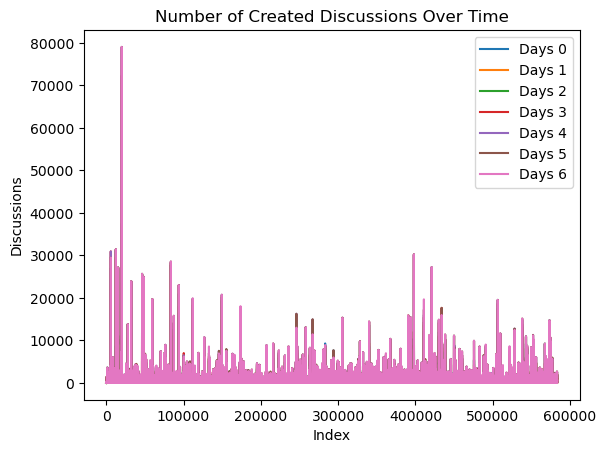

In [13]:
import matplotlib.pyplot as plt

# Plotting 'Number of Created Discussions' over time
for i in range(7):
    plt.plot(df.index, df[f'Number of Created Discussions {i}'], label=f'Days {i}')
plt.title('Number of Created Discussions Over Time')
plt.xlabel('Index')
plt.ylabel('Discussions')
plt.legend()
plt.show()

The line chart shows the trend in the number of discussions created over time for each week. The spikes represent periods of high activity, possibly due to trending topics or events.

This figure is useful for understanding the dynamics of discussions across different weeks, identifying peak discussion times, and potentially aligning them with external events.

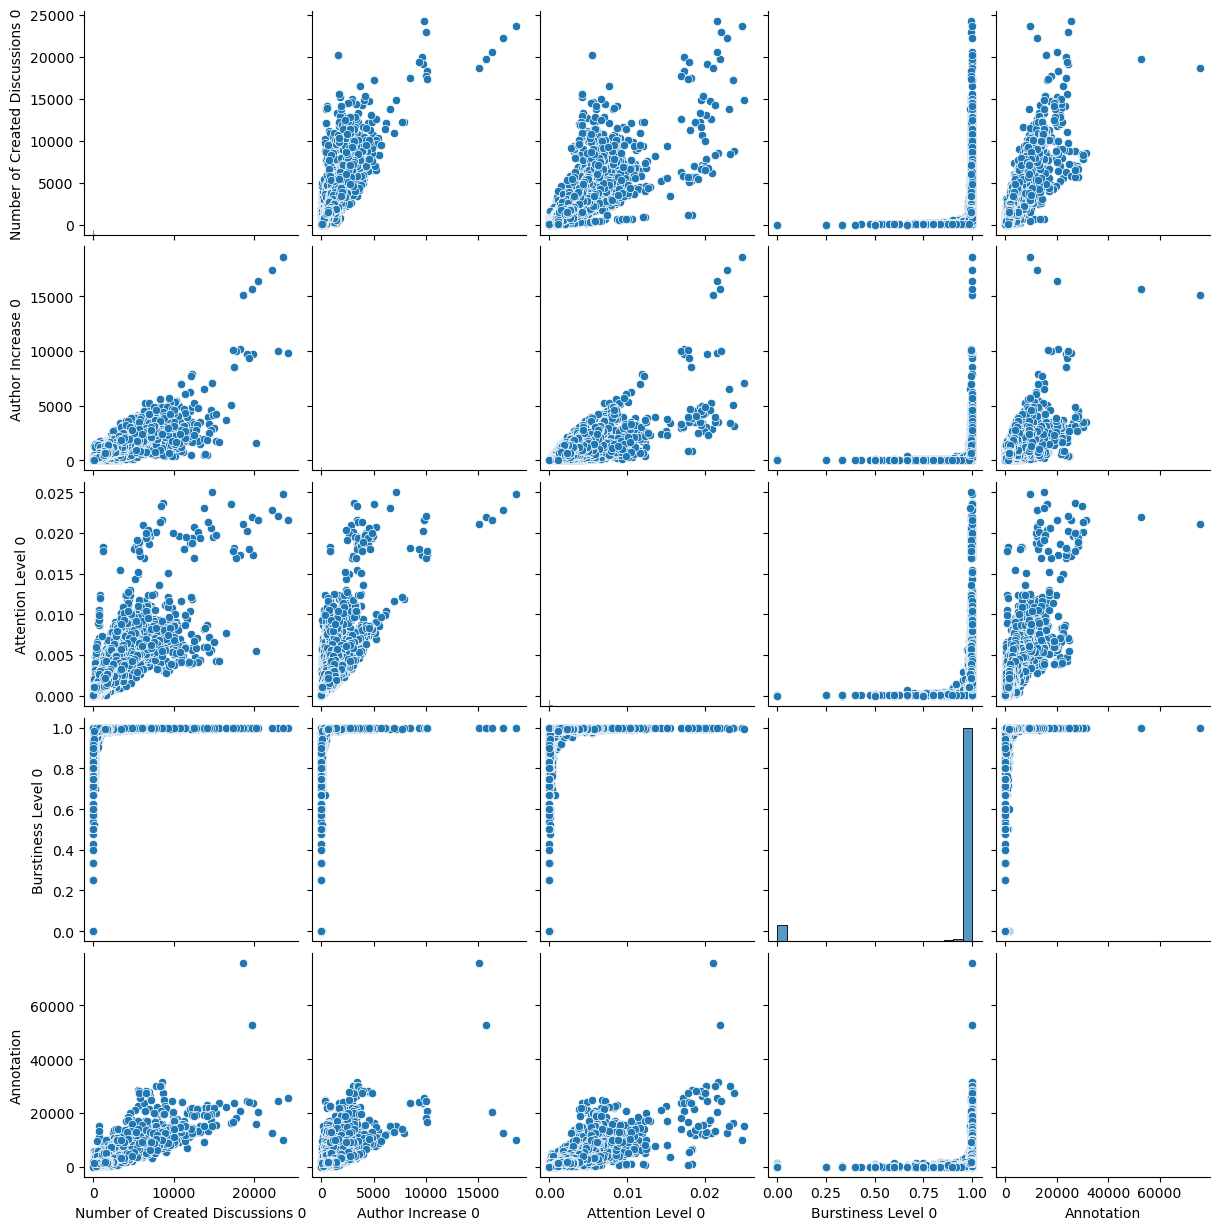

In [14]:
# Select a subset of features for the pairplot
subset = df[['Number of Created Discussions 0', 'Author Increase 0', 'Attention Level 0', 'Burstiness Level 0', 'Annotation']]

# Plot pairplot
sns.pairplot(subset)
plt.show()


### Inference and Relevance

The pairplot visualizes the relationships between the selected features: Number of Created Discussions 0, Author Increase 0, Attention Level 0, Burstiness Level 0, and Annotation. From the pairplot, we observe that there is a positive correlation between the Number of Created Discussions 0 and Author Increase 0, indicating that an increase in the number of authors is associated with more created discussions. Similarly, the Attention Level 0 and Burstiness Level 0 show a positive relationship with the Number of Created Discussions 0, suggesting that higher attention levels and burstiness correspond to more created discussions. The Annotation feature, representing overall engagement, also shows a positive correlation with the Number of Created Discussions 0, Author Increase 0, Attention Level 0, and Burstiness Level 0, indicating that these features are relevant for predicting user engagement.

The relevance of these findings lies in understanding the dynamics of user engagement on social media. The identified relationships between the features and the target variable (Annotation) can guide the feature selection process for the regression model. Additionally, the visual patterns observed in the pairplot can help in feature engineering, such as creating interaction terms or polynomial features, to enhance the model's predictive power. Before finalizing the features, it is essential to check for multicollinearity using the Variance Inflation Factor (VIF) and scale the features to ensure they are on the same scale. This approach will help build a robust regression model for predicting social media virality based on relevant features.


## Area Plot for "Cumulative Number of Created Discussions Over Time"

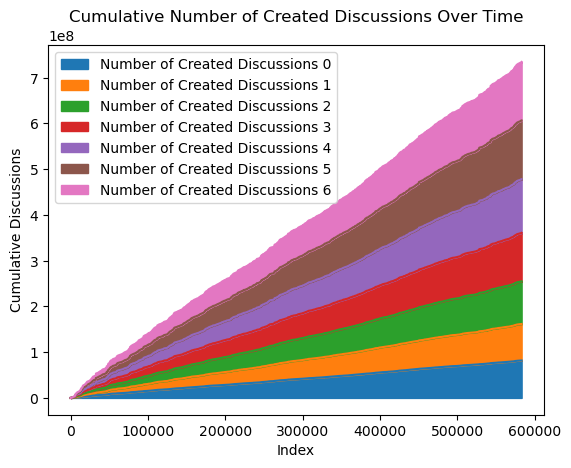

In [15]:
df[[f'Number of Created Discussions {i}' for i in range(7)]].cumsum().plot.area()
plt.title('Cumulative Number of Created Discussions Over Time')
plt.xlabel('Index')
plt.ylabel('Cumulative Discussions')
plt.show()

### Inference and Relevance

- The area plot visualizes the cumulative number of created discussions over time across seven days (Days 0 to 6). The plot shows a steady increase in cumulative discussions, indicating continuous engagement and interest in the topics discussed. Each layer represents the cumulative discussions for a specific day, and the colors distinguish the contributions of each day, demonstrating how discussions from different days accumulate over time. 

- This visualization helps in understanding long-term engagement trends on Twitter, identifying periods of high activity and sustained engagement. Although it is challenging to compare the relative thickness of each layer, the plot provides a clear picture of overall growth and highlights the sustained interest in topics, making it useful for understanding long-term trends and optimizing content strategies to maximize user attention on social media.


## Average Attention Level by Days

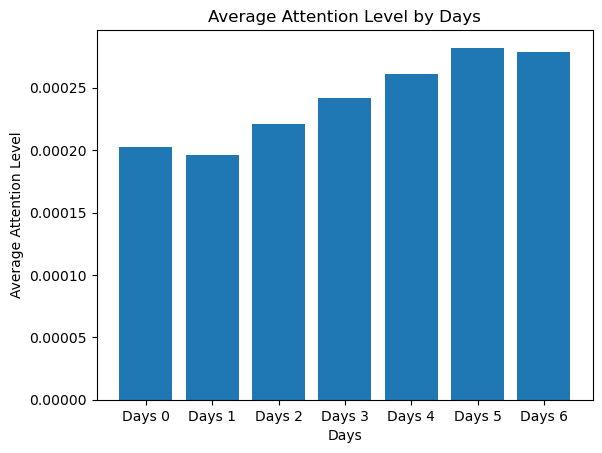

In [16]:
import numpy as np

# Bar plot for the average of 'Attention Level' by days
bar_data = [df[f'Attention Level {i}'].mean() for i in range(7)]
plt.bar(np.arange(7), bar_data)
plt.title('Average Attention Level by Days')
plt.xlabel('Days')
plt.ylabel('Average Attention Level')
plt.xticks(np.arange(7), [f'Days {i}' for i in range(7)])
plt.show()

Interpretation and Insights:
Increasing Trend: The attention level generally appears to increase as the days progress, with Day 0 having the lowest average attention level and Day 6 having the highest. This could suggest that as discussions or topics age through the week, they gain more attention, possibly as they develop, spread, or as more content accumulates.

Engagement Analysis: The gradual increase in attention levels could indicate that topics tend to build momentum over time. Alternatively, it might reflect a pattern where later in the week, users become more engaged or active. Understanding the context or events during these days could further clarify these trends.

Strategic Planning: For social media managers, marketers, or content creators, this pattern could be crucial for planning when to introduce new topics or content. For instance, launching significant discussions or promotions earlier in the week could capitalize on growing attention through the week.

Quantitative Measure: The small magnitude of the values suggests that the attention level metric might be scaled down or represent a small fraction of a larger measure. This scaling helps in normalizing the data but requires context to understand absolute engagement levels.

## Cluster Analysis of Authors and Discussions

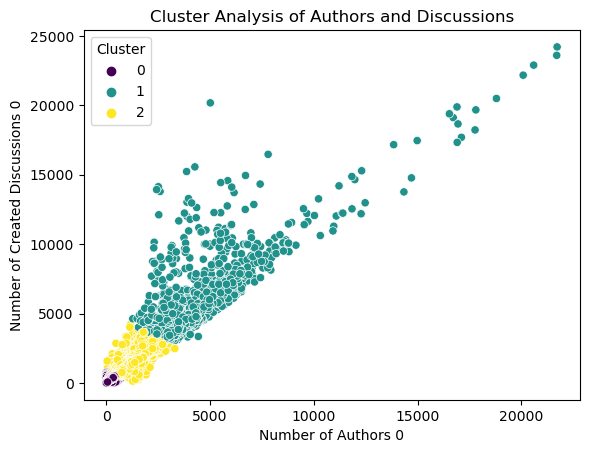

In [17]:

from sklearn.cluster import KMeans
import seaborn as sns

# Assume you are using PCA components or select features for clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['Number of Authors 0', 'Number of Created Discussions 0']])
df['Cluster'] = kmeans.labels_

# Plotting clusters
sns.scatterplot(x='Number of Authors 0', y='Number of Created Discussions 0', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Analysis of Authors and Discussions')
plt.show()

The plot you've provided is a scatter plot visualizing the results of a cluster analysis that groups data points based on their similarity in terms of the number of authors and the number of created discussions at Time 0.

Interpretation of the Plot:
Axes:

The x-axis represents the "Number of Authors 0", which is the number of authors participating in discussions at the initial time step.
The y-axis represents the "Number of Created Discussions 0", which shows how many discussions were created at the initial time step.
Clusters:

The data points are colored based on the cluster they belong to, which are labeled as Cluster 0, Cluster 1, and Cluster 2. These clusters are determined by the KMeans clustering algorithm, which groups data points so that the points within each cluster are closer to each other in terms of these two variables than to points in other clusters.
Cluster Characteristics:

Cluster 0 (Yellow): This cluster appears at the bottom left of the plot, indicating a group of data points with relatively low numbers of authors and discussions. This could represent topics that are less popular or nascent.
Cluster 1 (Purple): This cluster is located towards the middle part of the plot, indicating a moderate number of authors and discussions. These might be moderately popular topics.
Cluster 2 (Teal): Positioned at the upper end and stretching towards the right of the plot, this cluster represents topics with a high number of authors and discussions. This suggests highly popular or viral topics that attract a lot of participation.
Insights:
Trend: There is a clear positive correlation between the number of authors and the number of discussions, which indicates that as more authors participate, the number of discussions also tends to increase. This is logical, as more participants can generate more content and discussions.
Strategic Planning: For social media strategists and marketers, understanding these clusters can help in targeting engagement strategies. For example, resources might be directed more efficiently by focusing on the purple and teal clusters to leverage or grow existing engagement, while different strategies might be needed to kickstart discussions in the yellow cluster.
Community Dynamics: This plot can provide insights into the dynamics of community engagement on social media platforms, helping to identify which topics or content types are gaining traction and which are not.
This cluster analysis is a powerful way to visually and quantitatively segment data into meaningful groups for further analysis and strategic decision-making.

In [18]:
df1=df.copy(deep =True)

In [19]:
df1

,Number of Created Discussions 0,Number of Created Discussions 1,Number of Created Discussions 2,Number of Created Discussions 3,Number of Created Discussions 4,Number of Created Discussions 5,Number of Created Discussions 6,Author Increase 0,Author Increase 1,Author Increase 2,Author Increase 3,Author Increase 4,Author Increase 5,Author Increase 6,Attention Level 0,Attention Level 1,Attention Level 2,Attention Level 3,Attention Level 4,Attention Level 5,Attention Level 6,Burstiness Level 0,Burstiness Level 1,Burstiness Level 2,Burstiness Level 3,Burstiness Level 4,Burstiness Level 5,Burstiness Level 6,Number of Atomic Containers 0,Number of Atomic Containers 1,Number of Atomic Containers 2,Number of Atomic Containers 3,Number of Atomic Containers 4,Number of Atomic Containers 5,Number of Atomic Containers 6,Number of Contributions 0,Number of Contributions 1,Number of Contributions 2,Number of Contributions 3,Number of Contributions 4,Number of Contributions 5,Number of Contributions 6,Contribution Sparseness 0,Contribution Sparseness 1,Contribution Sparseness 2,Contribution Sparseness 3,Contribution Sparseness 4,Contribution Sparseness 5,Contribution Sparseness 6,Author Interaction 0,Author Interaction 1,Author Interaction 2,Author Interaction 3,Author Interaction 4,Author Interaction 5,Author Interaction 6,Number of Authors 0,Number of Authors 1,Number of Authors 2,Number of Authors 3,Number of Authors 4,Number of Authors 5,Number of Authors 6,Average Discussions Length 0,Average Discussions Length 1,Average Discussions Length 2,Average Discussions Length 3,Average Discussions Length 4,Average Discussions Length 5,Average Discussions Length 6,Number of Discussions 0,Number of Discussions 1,Number of Discussions 2,Number of Discussions 3,Number of Discussions 4,Number of Discussions 5,Number of Discussions 6,Annotation,Cluster
0,0,2,0,0,1,1,1,0,1,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000004,0.000004,0.000004,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,2,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000002,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,1,1,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,2,0,0,1,1,1,0.0,0
1,2,1,0,0,0,0,4,2,1,0,0,0,0,4,0.000007,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,0.000003,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,0.5,0
2,1,0,0,0,0,4,1,1,0,0,0,0,4,1,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,0.000002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,0.0,0
3,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0.000003,0.000000,0.000000,0.000003,0.000000,0.000000,0.000001,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,0.000002,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,2.5,0
4,0,1,0,0,1,2,3,0,1,0,0,1,2,3,0.000000,0.000003,0.000000,0.000000,0.000001,0.000002,0.000003,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.000000,0.000001,0.000000,0.000000,0.000000,0.000001,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.5,0
...,...,...,...,...,...,...,...,..

In [20]:
feature_columns = [col for col in df1.columns if 'Number of Created Discussions' in col] 
df1['Avg_Created_Discussions'] = df1[feature_columns].mean(axis=1)

In [21]:
feature_columns = [col for col in df1.columns if 'Author Increase' in col] 
df1['Avg Author Increase'] = df1[feature_columns].mean(axis=1)

In [22]:
feature_columns = [col for col in df1.columns if 'Attention Level' in col] 
df1['Avg Attention Level'] = df1[feature_columns].mean(axis=1)

In [23]:
feature_columns = [col for col in df1.columns if 'Burstiness Level' in col] 
df1['Avg Burstiness Level'] = df1[feature_columns].mean(axis=1)

In [24]:
feature_columns = [col for col in df1.columns if 'Number of Atomic Containers' in col] 
df1['Avg Number of Atomic Containers'] = df1[feature_columns].mean(axis=1)

In [25]:
feature_columns = [col for col in df1.columns if 'Number of Contributions' in col] 
df1['Avg Number of Contributions'] = df1[feature_columns].mean(axis=1)

In [26]:
feature_columns = [col for col in df1.columns if 'Contribution Sparseness' in col] 
df1['Avg Contribution Sparseness'] = df1[feature_columns].mean(axis=1)

In [27]:
feature_columns = [col for col in df1.columns if 'Author Interaction' in col] 
df1['Avg Author Interaction'] = df1[feature_columns].mean(axis=1)

In [28]:
feature_columns = [col for col in df1.columns if 'Number of Authors' in col] 
df1['Avg Number of Authors'] = df1[feature_columns].mean(axis=1)

In [29]:
feature_columns = [col for col in df1.columns if 'Average Discussions Length' in col] 
df1['Avg Average Discussions Length'] = df1[feature_columns].mean(axis=1)

In [30]:
feature_columns = [col for col in df1.columns if 'Number of Discussions' in col] 
df1['Avg Number of Discussions'] = df1[feature_columns].mean(axis=1)

In [31]:
columns = [
    'Avg Author Increase', 'Avg Attention Level', 'Avg Burstiness Level', 
    'Avg Number of Contributions', 'Avg Contribution Sparseness', 
    'Avg Author Interaction', 'Avg Number of Authors', 
    'Avg Average Discussions Length', 'Avg Number of Discussions'
]


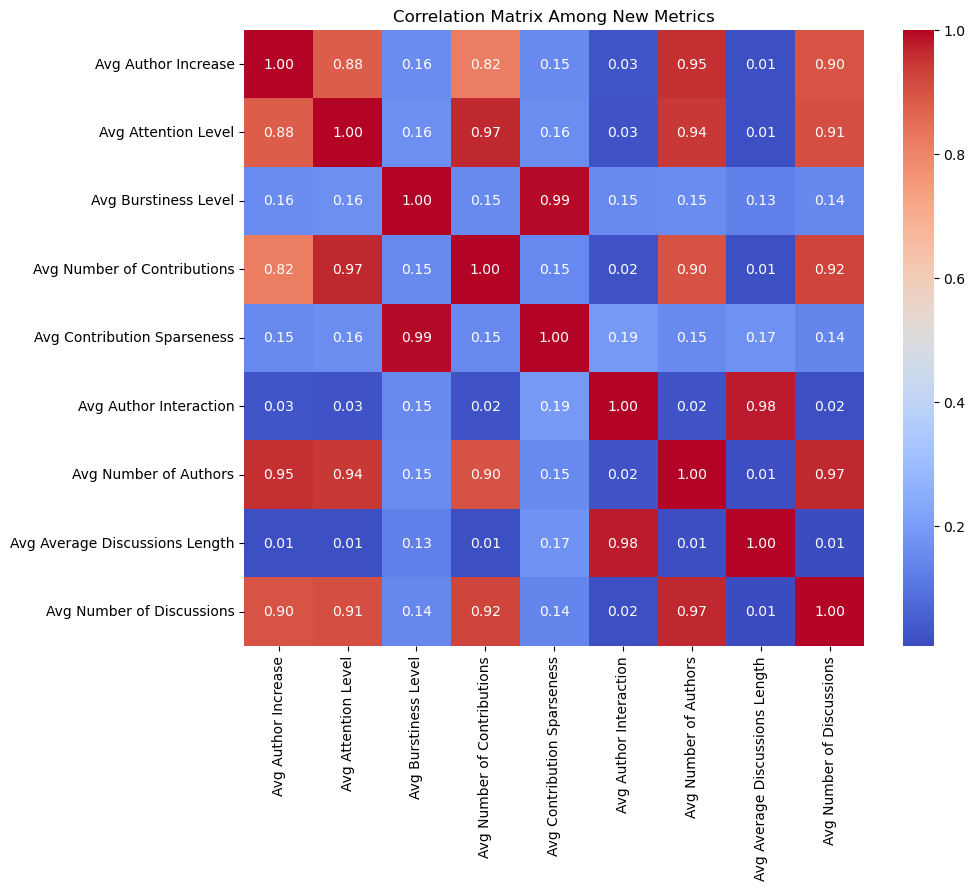

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the specified columns
corr = df1[columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Among New Metrics')
plt.show()


Correlation Matrix
Description:
The correlation matrix displays the correlation coefficients between different average metrics within your dataset. Each cell shows the correlation coefficient between two variables, where:

Values close to 1 or -1 indicate a strong positive or negative correlation, respectively.
Values around 0 indicate no linear correlation.
Interpretations:

High Positive Correlations: Metrics like Avg Author Increase and Avg Attention Level have very high correlations with other metrics such as Avg Number of Contributions (0.97 with Avg Attention Level). This suggests that increases in authors and the attention level are strongly associated with more contributions.
Low or No Correlations: Metrics like Avg Author Interaction have very low correlations with most other metrics, indicating that author interactions might be influenced by different factors not directly related to the general activity levels.
Potential Insights: The high correlation between metrics related to discussion activity (e.g., number of contributions, discussion length) suggests these factors are often influenced together by the same underlying trends or events.
Correlation Matrix: Provides a quantitative assessment of how closely related different aspects of discussion dynamics are within your dataset. It helps in identifying which factors move together, which could be critical for predictive modeling or causal inference.

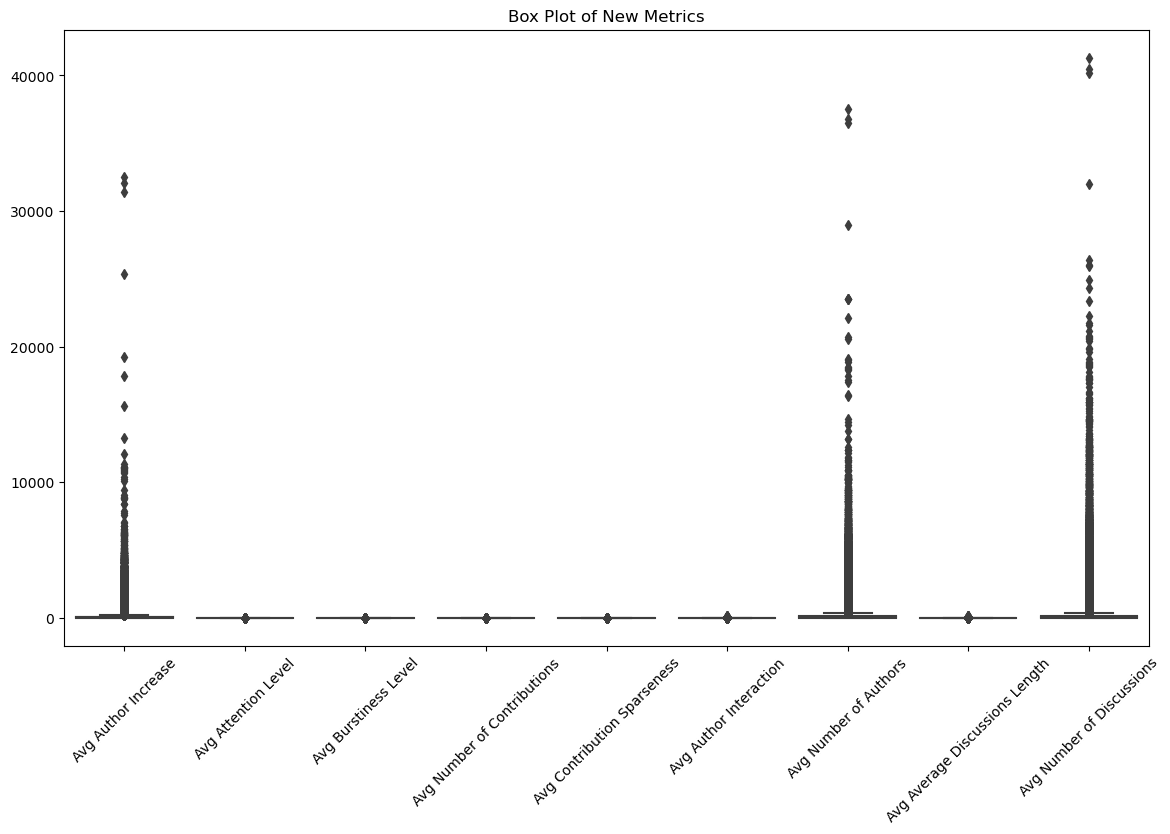

In [33]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df1[columns])
plt.xticks(rotation=45)
plt.title('Box Plot of New Metrics')
plt.show()


Box Plot of New Metrics
Description:
This box plot visualizes the distribution of various average metrics in your dataset. The plot highlights the median, interquartile range (IQR), and potential outliers for each metric.

Interpretations:

Spread and Outliers: The plot shows a significant spread in metrics like Avg Number of Discussions and Avg Number of Authors, with many outliers, indicating highly variable data for these metrics. Some days or topics might generate much higher discussion or author participation than usual.
Central Tendency: Metrics like Avg Burstiness Level and Avg Contribution Sparseness appear to have tighter distributions but still show some variability and outliers, suggesting most data points are clustered around the median yet certain values far exceed typical levels.
Skewness: The vertical spread of the boxes and the position of the whiskers indicate whether the data is skewed. For example, Avg Author Increase seems quite skewed towards higher values.
Box Plot: Offers a qualitative visual summary of the distributions of your metrics, which is crucial for identifying normal ranges, outliers, and overall variability. This can inform data cleaning processes (e.g., handling outliers), data normalization needs, and potential areas of interest for further investigation.

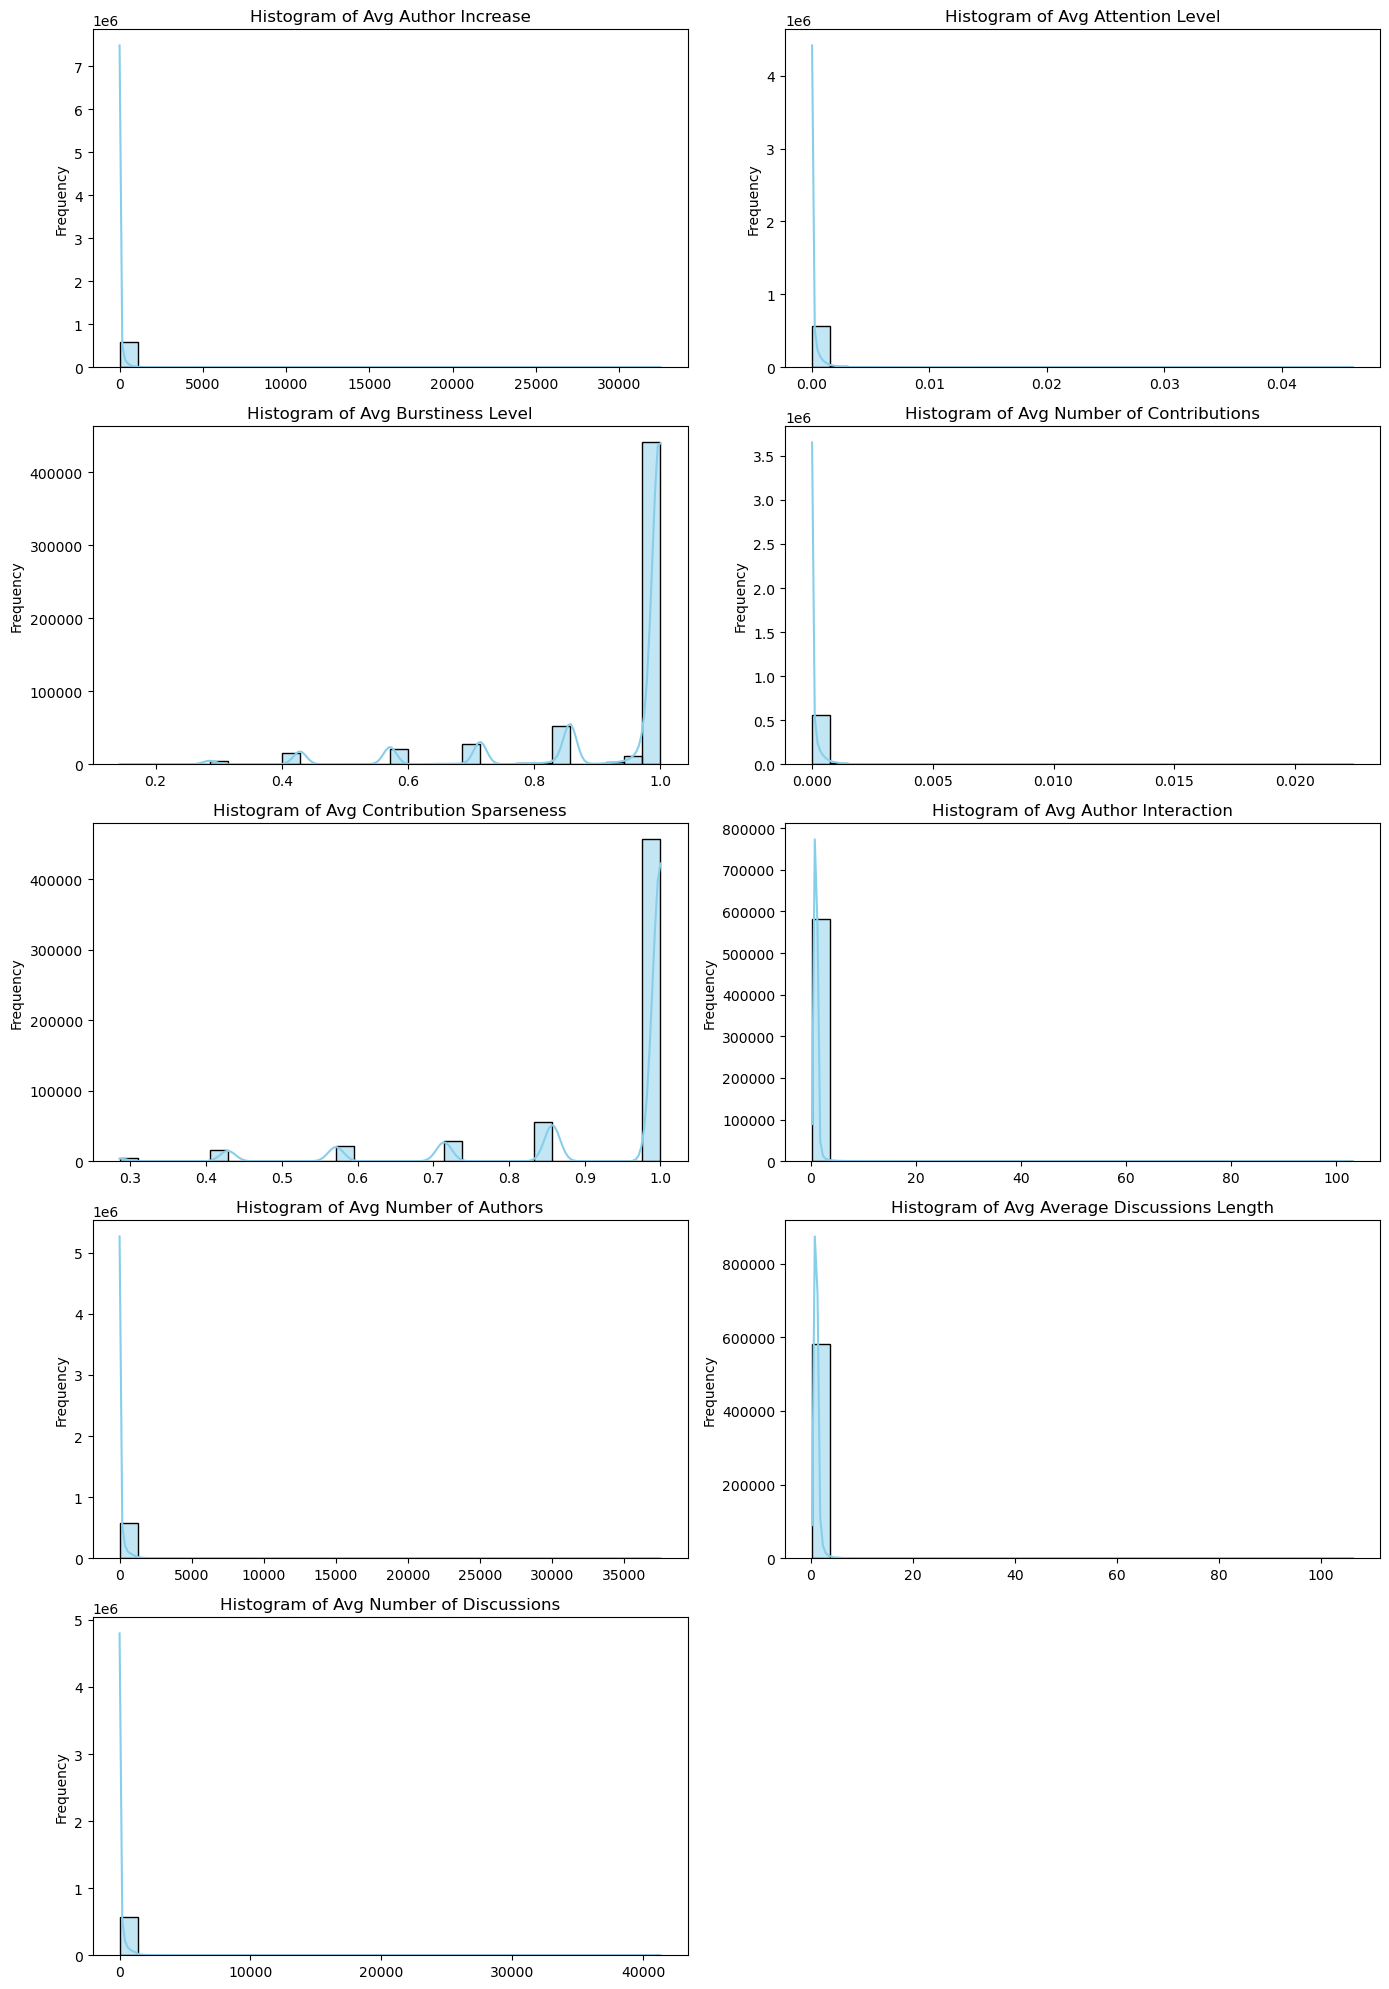

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # Adjust subplot grid as needed
axes = axes.flatten()  # Flatten the array to make iterating easier

for i, col in enumerate(columns):
    if i < len(columns):  # Check to prevent indexing errors on unused axes
        sns.histplot(df1[col], bins=30, ax=axes[i], color='skyblue', kde=True)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()


The histograms you provided show the distribution of various average metrics across your dataset. Each histogram provides a visual representation of how frequently different values occur within each metric. Here’s an analysis of each:

Histograms Analysis
Avg Author Increase & Avg Attention Level

These histograms have a high concentration of values near zero with a long tail, indicating that there are a few instances with significantly higher values compared to most. This suggests that increases in authors and attention levels are typically low but can occasionally spike, possibly due to specific events or discussions that attract much more interest.
Avg Burstiness Level

The distribution for burstiness levels is multimodal, showing specific peaks, particularly near the higher end (around 0.8 to 1.0). This could indicate that discussions either tend to have very high burstiness or cluster around other specific lower values, suggesting periods of intense activity followed by quieter times.
Avg Number of Contributions

Similarly to author increase and attention level, this metric is highly skewed with most values near zero, indicating that most of the time contributions are low, with occasional spikes where contributions significantly increase.
Avg Contribution Sparseness

The histogram for sparseness shows a very high frequency of values at 1.0 and another smaller peak around 0.8. This indicates that contributions are generally very sparse, with a majority of the contributions being very spread out across discussions.
Avg Author Interaction

This histogram shows most values concentrated near zero, with a few higher values, reflecting that most discussions have low author interaction with occasional higher interactions.
Avg Number of Authors & Avg Average Discussions Length

Both metrics show a highly skewed distribution with values clustered near the lower end and some outliers, indicating that most discussions involve fewer authors and are shorter, with fewer instances involving more authors or longer discussions.
Avg Number of Discussions

Similar to many other metrics, the number of discussions is also highly skewed with most values near zero, suggesting that high discussion counts are uncommon.
Insights and Implications
Skewness: Almost all metrics show a pronounced skewness towards lower values, which can be typical for social media data where many posts or discussions don't gain traction, while a few become very popular or active.
Outliers: The presence of outliers in almost all metrics suggests that there are occasional instances or topics that generate significantly more activity than usual. These outliers might be worth investigating to understand what drives significant increases in interaction, attention, or authorship.
Data Distribution: The multimodality and skewness in these distributions could have implications for data modeling. Standard models might not fit well without transformations or considering non-parametric models that don't assume normal distribution.
These histograms are useful for understanding the overall behavior of data, preparing for data preprocessing steps like normalization or outlier handling, and for guiding further analyses to focus on what drives the spikes in various metrics.

In [35]:
X = df.iloc[ : ,0:77]
y = df.iloc[ : ,77:78]

In [36]:
#For Model Selection we execute on 10% of the data
Dummytrain,sample_data,Dummytrain2,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

X = sample_data
y = sample_target

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
#We choose the MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_full_scaled = scaler.fit_transform(X)

In [38]:
X_train.shape

(43743, 77)

### Ridge Regression

In [39]:
from sklearn.ensemble import BaggingRegressor

In [50]:
model_name = 'RidgeRegression'

x_range = [0.001, 0.01, 0.1, 1, 5, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

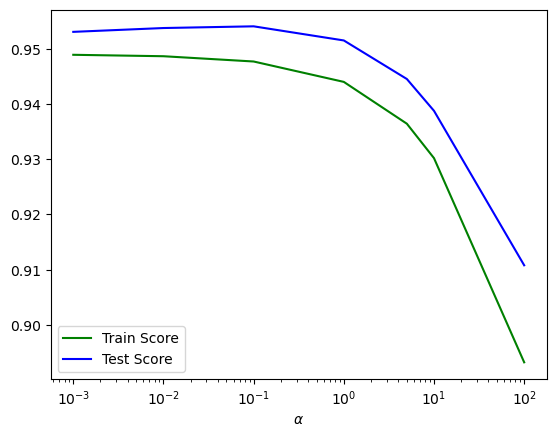

In [51]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [52]:
#Searching for the best parameter
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 5, 10, 100]}
ridge = Ridge()
gridsearch = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True, n_jobs=-1)

In [53]:
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [61]:
best_parameters = str(gridsearch.best_params_)

print("Best parameters: {}".format(gridsearch.best_params_))

report_table = report_table + [[model_name, best_parameters, train_score, test_score]]



Best parameters: {'alpha':0.1}


In [104]:
model_name = 'RidgeRegression(Bagging)'

In [105]:
ridge = Ridge(alpha=0.1)
bag_reg = BaggingRegressor(ridge, n_estimators = 100, max_samples= 500, n_jobs = -1, random_state=0)

In [106]:
bag_reg.fit(X_train, y_train)
train_score = bag_reg.score(X_train, y_train)
test_score = bag_reg.score(X_test, y_test)

In [107]:
best_parameters = ' alpha=0.1'
report_table = [[model_name, best_parameters, train_score, test_score]]

In [119]:
#Appending the model specific report
report_tabledf_bag_boost = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf_bag_boost

,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
LassoRegression(Bagging),alpha=0.01,0.946896,0.952229


In [ ]:
bestridgeparameter = gridsearch.best_params_['alpha']

### Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

model_name = 'LassoRegression'

param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso()
gridsearch = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [45]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))



Best parameters: {'alpha': 0.01}


Text(0.5, 0, '$\\alpha$')

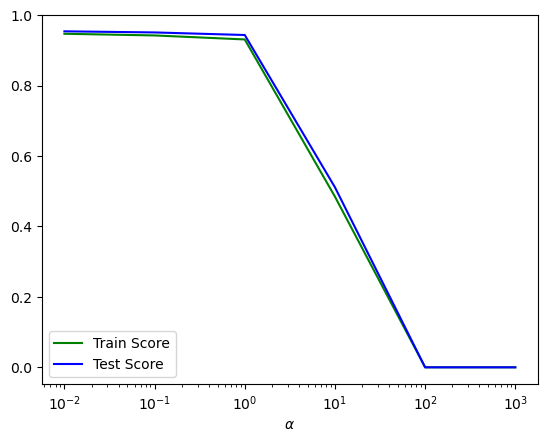

In [64]:
#Visually verifying the best parameters
alpha_range = [0.01, 0.1, 1, 10, 100, 1000]

train_score_list = []
test_score_list = []

for alpha in alpha_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(alpha_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [65]:
bestlassoalpha = gridsearch.best_params_['alpha']

In [113]:
model_name = 'LassoRegression(Bagging)'

In [114]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
bag_reg_lasso = BaggingRegressor(lasso, n_estimators = 100, max_samples= 500, n_jobs = -1, random_state=0)

In [115]:
bag_reg_lasso.fit(X_train, y_train)
train_score = bag_reg_lasso.score(X_train, y_train)
test_score = bag_reg_lasso.score(X_test, y_test)

In [117]:
best_parameters = 'alpha=0.01'
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

In [121]:
report_tabledf_bag_boost = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf_bag_boost

,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
LassoRegression(Bagging),alpha=0.01,0.946896,0.952229


In [92]:
import pickle



lasso_reg_baffing = 'bag_reg_lasso_model1.pkl'

# Open a file in write-binary mode
with open(lasso_reg_baffing, 'wb') as file:
    # Use pickle to dump the model into the file
    pickle.dump(bag_reg_lasso, file)

print(f"Model saved to {lasso_reg_baffing}")

Model saved to bag_reg_lasso_model1.pkl


## DTree (Adaboost)

In [122]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


model_name = 'DTree(Adaboost)'

dtree = DecisionTreeRegressor()
param_grid = {'base_estimator__max_depth': [3, 5, 7, 9, 12]}
adatree = AdaBoostRegressor(dtree, n_estimators = 100, learning_rate= 0.5, random_state=0)


grid = GridSearchCV(adatree, param_grid, cv=5, n_jobs=-1, return_train_score=True)

In [123]:
grid.fit(X_train, y_train)
train_score = grid.score(X_train, y_train)
test_score = grid.score(X_test, y_test)

In [124]:
best_parameters = str(grid.best_params_)
print("Best parameters: {}".format(grid.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

Best parameters: {'base_estimator__max_depth': 12}


In [125]:
#Appending the model specific report
report_tabledf_bag_boost = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf_bag_boost

,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
LassoRegression(Bagging),alpha=0.01,0.946896,0.952229
DTree(Adaboost),{'base_estimator__max_depth': 12},0.993712,0.941530


##  Linear Regression ADABoost Regressor

In [126]:
from sklearn.ensemble import AdaBoostRegressor

model_name = 'LinearRegression(Adaboost)'

In [127]:
lreg = LinearRegression()
adatree = AdaBoostRegressor(lreg, n_estimators = 100, learning_rate= 0.5, random_state=0)

In [128]:
adatree.fit(X_train, y_train)
train_score = adatree.score(X_train, y_train)
test_score = adatree.score(X_test, y_test)

In [129]:
best_parameters = 'N/A'
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

In [130]:
#Appending the model specific report
report_tabledf_bag_boost = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf_bag_boost

,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
LassoRegression(Bagging),alpha=0.01,0.946896,0.952229
DTree(Adaboost),{'base_estimator__max_depth': 12},0.993712,0.941530
LinearRegression(Adaboost),N/A,0.924493,0.917454


## Gradient Boosting Regressor

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
model_name ='GradientBoostingRegressor'

In [133]:
#There is a trade-off between learning rate and number of estimators, hence we will do a grid search

gbrt = GradientBoostingRegressor(max_depth=3, random_state=0)
param_grid = {'n_estimators': [100, 200], 'learning_rate':[0.5, 1.0]}

In [134]:
grid_gbrt = GridSearchCV(gbrt, param_grid, cv=5, n_jobs=-1, return_train_score=True)

In [135]:
grid_gbrt.fit(X_train, y_train)
train_score = grid_gbrt.score(X_train, y_train)
test_score = grid_gbrt.score(X_test, y_test)

In [136]:
best_parameters = str(grid_gbrt.best_params_)
print("Best parameters: {}".format(grid_gbrt.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}


In [137]:
#Appending the model specific report
report_tabledf_bag_boost = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf_bag_boost

,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
LassoRegression(Bagging),alpha=0.01,0.946896,0.952229
DTree(Adaboost),{'base_estimator__max_depth': 12},0.993712,0.941530
LinearRegression(Adaboost),N/A,0.924493,0.917454
GradientBoostingRegressor,"{'learning_rate': 0.5, 'n_estimators': 100}",0.981435,0.938233


## Models With PCA

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#First Scaling the Data
X_scaled = sc.fit_transform(X)

In [67]:
pca = PCA(n_components=0.95) #We apply Principal Component Analysis to explain the maximum variance

In [68]:
X_reduced = pca.fit_transform(X_scaled)

In [69]:

X_reduced.shape

(58325, 18)

In [70]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, random_state=0)

In [71]:
model_name = 'LinearRegression(PCA)'


lreg = LinearRegression()
lreg.fit(X_reduced_train, y_train)
train_score = lreg.score(X_reduced_train, y_train)
test_score= lreg.score(X_reduced_test, y_test)

In [72]:
best_parameters = 'N/A'
report_table_PCA_comp = [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport_PCA_Project.xlsx')
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411


In [73]:
model_name = 'RidgeRegression(PCA)'
ridge = Ridge(alpha=0.1)
ridge.fit(X_reduced_train, y_train)
train_score = ridge.score(X_reduced_train, y_train)
test_score = ridge.score(X_reduced_test, y_test)

In [74]:
print(train_score)

0.9177959795875854


In [75]:
best_parameters = 'alpha=0.1'


report_table_PCA_comp = report_table_PCA_comp + [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters ', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411
RidgeRegression(PCA),alpha=0.1,0.917796,0.920411


In [76]:
from sklearn.linear_model import Lasso

model_name = 'LassoRegression(PCA)'


lasso = Lasso(alpha=0.01)
lasso.fit(X_reduced_train, y_train)
train_score = lasso.score(X_reduced_train, y_train)
test_score = lasso.score(X_reduced_test, y_test)

In [77]:
best_parameters = 'alpha=0.01'

report_table_PCA_comp = report_table_PCA_comp + [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411
RidgeRegression(PCA),alpha=0.1,0.917796,0.920411
LassoRegression(PCA),alpha=0.01,0.917796,0.920410


### Linear SVR

In [78]:
#Firstly working with Linear SVR
model_name = 'SupportVectorRegression'

#First doing linear SVR

regressor = LinearSVR()
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

gridsearch = GridSearchCV(regressor, param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [79]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'C': 1000}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
RidgeRegression(Bagging),alpha=0.01,0.946896,0.952229
DTree(Adaboost),{'base_estimator__max_depth': 12},0.993712,0.941530
LinearRegression(Adaboost),N/A,0.924493,0.917454
GradientBoostingRegressor,"{'learning_rate': 0.5, 'n_estimators': 100}",0.981435,0.938233
SupportVectorRegression,{'C': 1000},0.944601,0.949162


Text(0.5, 0, '$\\alpha$')

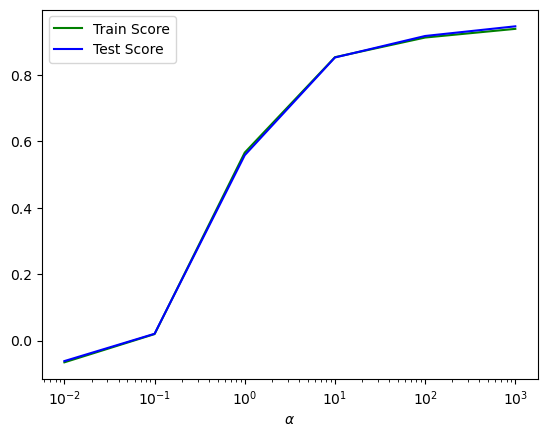

In [81]:
#Visualizing the best parameters for verification
C_range = [0.01, 0.1, 1, 10, 100, 1000]

train_score_list = []
test_score_list = []

for cvalue in C_range:
    regressor = LinearSVR(C=cvalue)
    regressor.fit(X_train,y_train)
    train_score_list.append(regressor.score(X_train,y_train))
    test_score_list.append(regressor.score(X_test, y_test))

plt.plot(C_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 2)
plt.xlabel(r'$\alpha$')

In [118]:
bestCforSVR = gridsearch.best_params_['C']

In [80]:
#Firstly working with Linear SVR
model_name = 'LinearSVR(PCA)'


#First doing linear SVR

regressor = LinearSVR(C=1000)
regressor.fit(X_reduced_train, y_train)
train_score = regressor.score(X_reduced_train, y_train)
test_score = regressor.score(X_reduced_test, y_test)

In [81]:
best_parameters = 'C=1000'

report_table_PCA_comp = report_table_PCA_comp + [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy' ]).set_index('Model', drop=True)
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411
RidgeRegression(PCA),alpha=0.1,0.917796,0.920411
LassoRegression(PCA),alpha=0.01,0.917796,0.920410
LinearSVR(PCA),C=1000,0.904510,0.918872


## Kernel SVC

In [134]:
#Now working with Kernel SVC 

model_name = 'KernelSVR'

regressor = SVR(kernel='rbf')

param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.1, 1.0, 10.0, 100]}

gridsearch = GridSearchCV(regressor, param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [83]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]





Best parameters: {C: 10, gamma: 0.1}


In [136]:
bestCforKernelSVR = gridsearch.best_params_['C']
bestgammaforKernelSVR = gridsearch.best_params_['gamma']

In [140]:
scores

array([[-0.07610898, -0.07141938, -0.07059013, -0.07244915],
       [-0.05485465, -0.01321391,  0.03266204, -0.03915177],
       [ 0.07377204,  0.25720451,  0.16034813,  0.03576457],
       [ 0.6013538 ,  0.42395368,  0.25757253,  0.13588007]])

In [82]:
#Now working with Kernel SVC 

model_name = 'KernelSVR(PCA)'


regressor = SVR(kernel='rbf', C=10, gamma=0.1)

regressor.fit(X_reduced_train, y_train)
train_score = regressor.score(X_reduced_train, y_train)
test_score = regressor.score(X_reduced_test, y_test)

In [83]:
best_parameters = 'C=10; gamma=0.1'

report_table_PCA_comp = report_table_PCA_comp + [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411
RidgeRegression(PCA),alpha=0.1,0.917796,0.920411
LassoRegression(PCA),alpha=0.01,0.917796,0.920410
LinearSVR(PCA),C=1000,0.904510,0.918872
KernelSVR(PCA),C=10; gamma=0.1,0.180316,0.163103


## KNN Regression

In [84]:
model_name = 'KNNRegression'

knnreg =  KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 3, 5, 10, 20]}


grid_search = GridSearchCV(knnreg, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

In [85]:
best_parameters = str(grid_search.best_params_)
print("Best parameters: {}".format(grid_search.best_params_))
knnregress_best = grid_search.best_params_['n_neighbors']
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'n_neighbors': 3}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
RidgeRegression(Bagging),alpha=0.01,0.946896,0.952229
DTree(Adaboost),{'base_estimator__max_depth': 12},0.993712,0.941530
LinearRegression(Adaboost),N/A,0.924493,0.917454
GradientBoostingRegressor,"{'learning_rate': 0.5, 'n_estimators': 100}",0.981435,0.938233
SupportVectorRegression,{'C': 1000},0.944601,0.949162
KNNRegression,{'n_neighbors': 3},0.962273,0.931269


Text(0, 0.5, 'MSE')

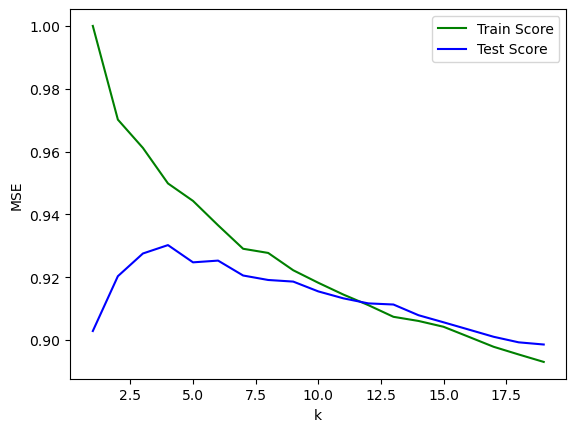

In [86]:
#Visualizing the ideal parameters

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1, 20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [86]:
model_name = 'KNNRegression(PCA)'


knnreg =  KNeighborsRegressor(n_neighbors=3)

knnreg.fit(X_reduced_train, y_train)
train_score = knnreg.score(X_reduced_train, y_train)
test_score = knnreg.score(X_reduced_test, y_test)

In [87]:
best_parameters = 'n_neighbors=3'

report_table_PCA_comp = report_table_PCA_comp + [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411
RidgeRegression(PCA),alpha=0.1,0.917796,0.920411
LassoRegression(PCA),alpha=0.01,0.917796,0.920410
LinearSVR(PCA),C=1000,0.904510,0.918872
KernelSVR(PCA),C=10; gamma=0.1,0.180316,0.163103
KNNRegression(PCA),n_neighbors=3,0.957378,0.908984


## Polynomial Regression 

In [88]:


model_name = 'PolynomialRegression'
#Defining the Polynomial Regression Function
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(1,3)}
gridsearch = GridSearchCV(PolynomialRegression(), param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [89]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
bestpolydegree = gridsearch.best_params_['polynomialfeatures__degree']


#Appending the main report list
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf



Best parameters: {'polynomialfeatures__degree': 1}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
RidgeRegression(Bagging),alpha=0.1,0.913418,0.921260
RidgeRegression(Bagging),alpha=0.01,0.946896,0.952229
DTree(Adaboost),{'base_estimator__max_depth': 12},0.993712,0.941530
LinearRegression(Adaboost),N/A,0.924493,0.917454
GradientBoostingRegressor,"{'learning_rate': 0.5, 'n_estimators': 100}",0.981435,0.938233
SupportVectorRegression,{'C': 1000},0.944601,0.949162
KNNRegression,{'n_neighbors': 3},0.962273,0.931269
PolynomialRegression,{'polynomialfeatures__degree': 1},0.950684,0.953233


In [90]:
from  sklearn.preprocessing  import PolynomialFeatures
model_name = 'PolynomialRegression(PCA)'

#Defining the Polynomial Regression Function

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_reduced_train)
X_test_poly = poly.transform(X_reduced_test)

lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)

train_score = lreg.score(X_train_poly, y_train)
test_score = lreg.score(X_test_poly, y_test)

In [91]:
best_parameters = 'Trial: Degree=2'

report_table_PCA_comp = report_table_PCA_comp + [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table_PCA_comp, columns = ['Model', 'Best Parameters ', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression(PCA),N/A,0.917796,0.920411
RidgeRegression(PCA),alpha=0.1,0.917796,0.920411
LassoRegression(PCA),alpha=0.01,0.917796,0.920410
LinearSVR(PCA),C=1000,0.904510,0.918872
KernelSVR(PCA),C=10; gamma=0.1,0.180316,0.163103
KNNRegression(PCA),n_neighbors=3,0.957378,0.908984
PolynomialRegression(PCA),Trial: Degree=2,0.943187,0.864352


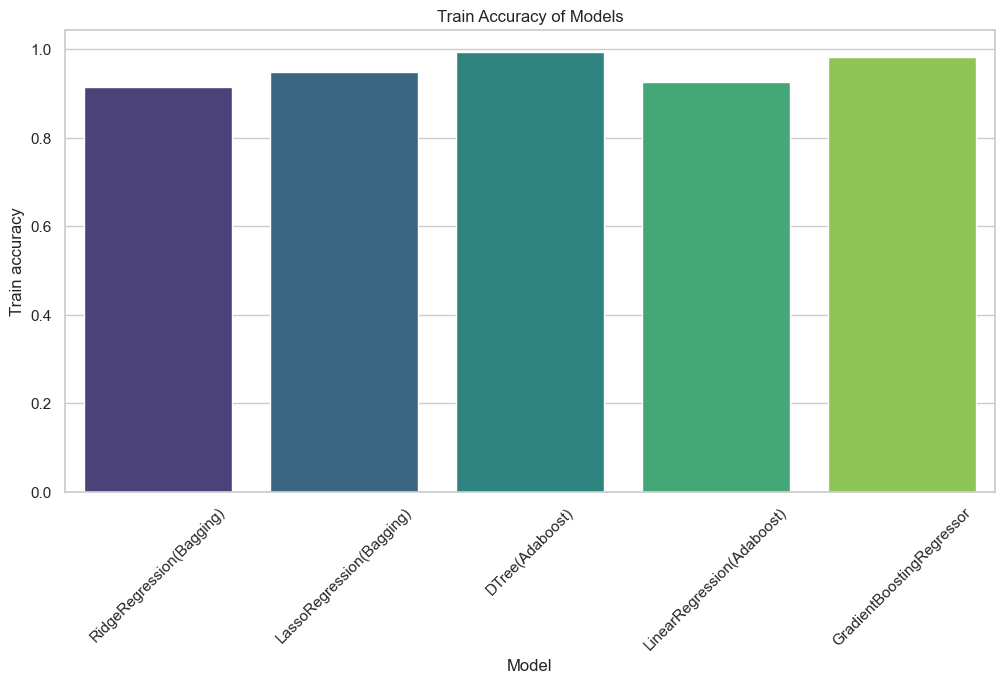

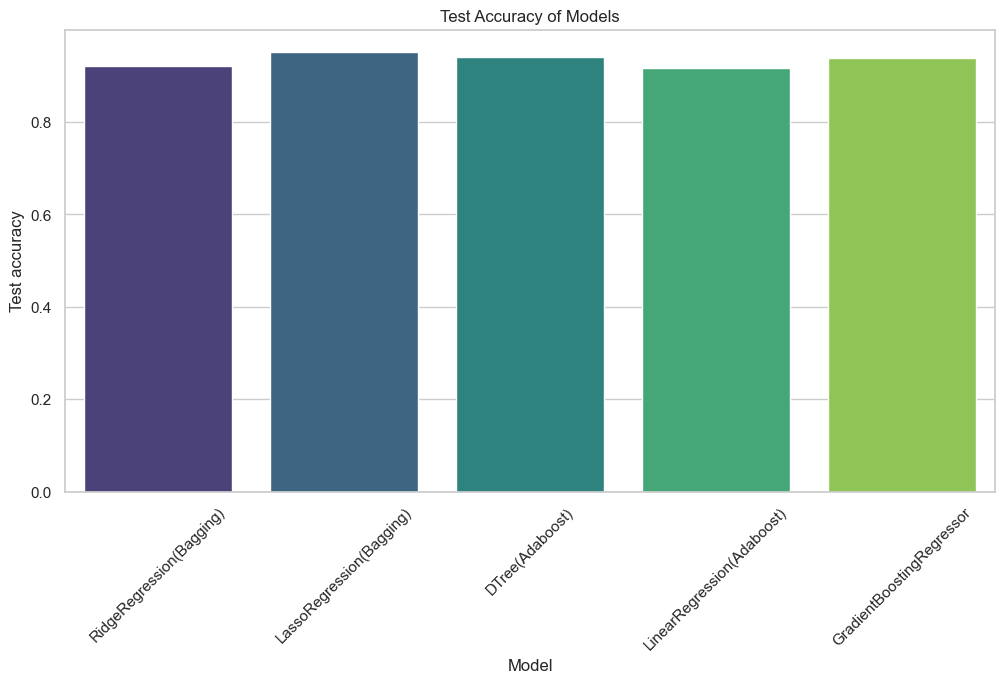

In [138]:
# Resetting the index to use it in plots
df = report_tabledf_bag_boost.reset_index()

# Setting the style
sns.set(style="whitegrid")

# Bar plot for train accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Train accuracy', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Train Accuracy of Models')
plt.show()

# Bar plot for test accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test accuracy', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Test Accuracy of Models')
plt.show()


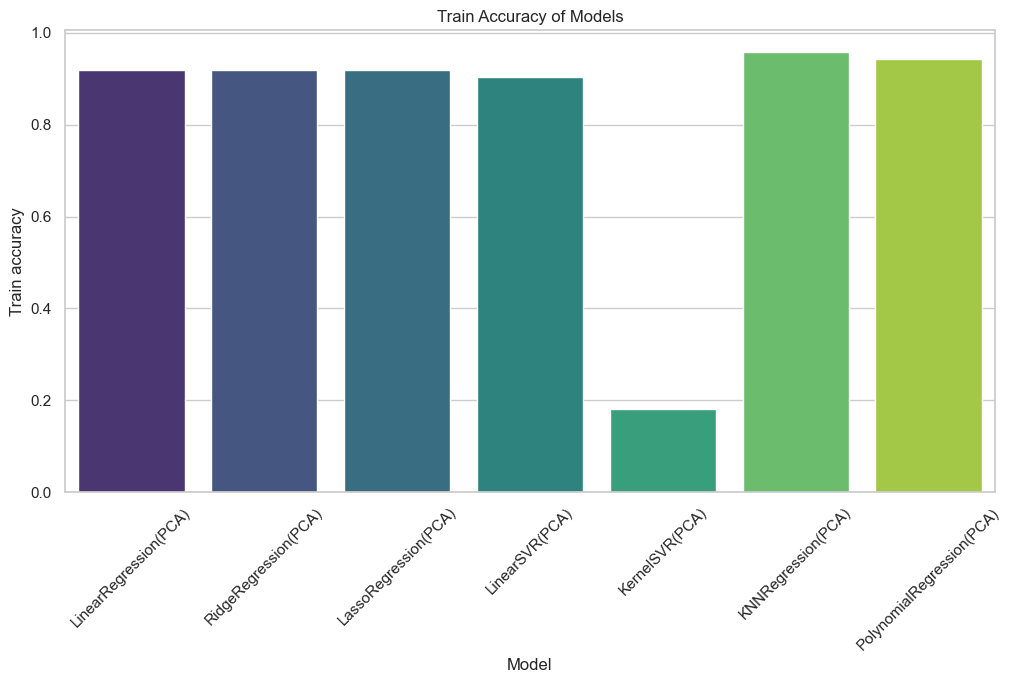

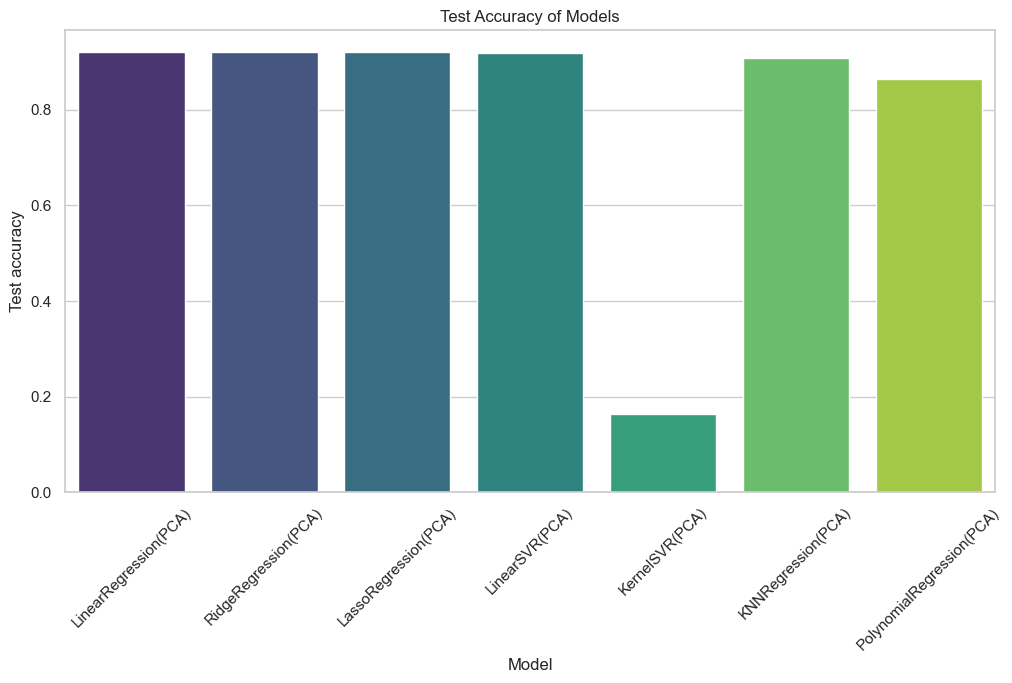

In [93]:

# Resetting the index to use it in plots
df = report_tabledf.reset_index()

# Setting the style
sns.set(style="whitegrid")

# Bar plot for train accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Train accuracy', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Train Accuracy of Models')
plt.show()

# Bar plot for test accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test accuracy', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Test Accuracy of Models')
plt.show()

